<a href="https://www.kaggle.com/code/alirizaercan/santander-data-science-details-and-explanation?scriptVersionId=166853554" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
***We will focus Santander dataset in this code. It is very important for all user. We can say it is really important for real life problems. I will try to review this code from a beginner view. If you are ready, let's go!***


**We will have some parts in this code. These parts include every part of data science life cycle. If you want to be a succesfull data scientist/analyst/engineer, you shouldn't pass these life cycle steps!**

<font color = 'darkblue'>
Content:

1. [Problem Definition and Project Planning](#1)
2. [Import Libraries](#2)   
3. [Load and Check Data](#3)
4. [Understand Dataset](#4)
5. [Column Description](#5)
6. [Exploratory Data Analysis](#6)   
    * [Univariate Variable Analysis(EDA)](#7)
7. [Basic Data Analysis](#8)
8. [Data Cleaning](#9)
    * [Outlier Detection](#10)
    * [Missing Values](#11)
9. [Feature Engineering](#12)
10. [Modeling](#13)
11. [Prediction and Submission](#14)

<a id = "1"></a><br>
# Problem Definition and Project Planning

## Problem Definition

The objective of this project is to build a predictive model that answers the question: "Which customers are more likely to make a specific transaction in the future?" This challenge involves analyzing customer data, including features such as var0 to var199, IDcode, and the target variable, to predict the likelihood of a transaction based on these characteristics.

### Project Planning

#### Understanding the Objective

Our main goal is to find the most optimal **submission.csv** file, predicting whether a customer will make a specific transaction.

#### Data Explanation

**Data Split:**

The dataset is divided into two groups:

- **Training set (train.csv):** Used to build machine learning models, with the ground truth provided for each customer.
- **Test set (test.csv):** Used to evaluate model performance on unseen data, with no ground truth provided.

**Target Variable:**

- **Target:** Binary variable indicating whether a customer will make a specific transaction (1) or not (0).

**Key Features:**

- **var0 to var199:** Various features representing customer attributes.
- **IDcode:** Unique identifier for each customer.

#### Import Libraries

We will import the necessary libraries to perform data analysis and build machine learning models.

#### Load and Check Data

We will read and check the Santander dataset in CSV format, containing columns such as var0 to var199, IDcode, and the target variable.

#### Understand Dataset

We will explore the dataset to gain a comprehensive understanding of its structure and contents.

#### Column Description

We will review columns.

#### Exploratory Data Analysis (EDA)

We will conduct Exploratory Data Analysis to deepen our understanding of the dataset. This includes visualizing data to uncover patterns and relationships.

#### Basic Data Analysis

We will perform basic data analysis to gain insights into the dataset.

#### Data Cleaning

We will clean the data by addressing issues such as duplicates, missing values, reformatting data types, checking and handling outliers, and validating.

#### Feature Engineering

We will focus on feature engineering to enhance the dataset for better model performance.

#### Modelling

We will choose the best machine learning model for predicting customer transactions based on the dataset.

#### Submission File

We will create the submission file, adhering to the required format.

Now, let's proceed with the code implementation according to these planned steps. Understanding each step is crucial for a comprehensive data science approach. Happy coding!


<a id = "2"></a><br>
# Import Libraries
We will need some libraries in this project, we need to import necessary libraries. We didn't choose our model so we will talk about model later. We can add our machine learning model libraries later. We can add 'matplotlib', 'seaborn', 'matplotlib.pyplot', 'warning' libraries right now. I can explain their roles in data science like that: 

**NumPy:**
Provides efficient numerical computation capabilities for arrays and matrices.

**Pandas:**
Offers high-performance, easy-to-use data structures and data analysis tools for labeled data.

**Matplotlib:**
Creates various static, animated, and interactive visualizations for data exploration and communication.

**Seaborn:**
Builds upon Matplotlib to create high-level statistical graphics with a focus on aesthetics and ease of use.

**warnings:**
Controls how Python handles warning messages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/tmp/ipykernel_17/3803698544.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


<a id = "3"></a><br>
# Load and Check Data
We will load and check data in this step.

In [2]:
train_df = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')
test_ID = test_df["ID_code"]

We need to assign train_df and test_df in here. 

In [3]:
train_df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


<a id = "4"></a><br>
# Understand Dataset
We can understand dataset with some codes and we can check the dataset.

We can see the columns of train dataset:

In [4]:
train_df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

We will see the first 10 index and last 10 index in the below codes :

train_df.head(10)

In [5]:
train_df.tail(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199990,train_199990,1,14.1475,1.8568,11.0066,3.6779,12.1944,-16.5936,5.3217,14.8508,...,-6.4708,4.7287,1.9034,7.2324,20.6047,1.7170,-4.0032,9.1627,13.8077,-1.9646
199991,train_199991,0,9.9909,2.5523,11.9653,6.3958,13.5497,-9.5293,6.0864,14.1789,...,12.0737,5.2139,0.8094,-0.6585,17.0548,0.5328,-5.3444,8.5414,13.2895,-6.7896
199992,train_199992,0,12.2825,2.6918,15.4684,6.4262,10.9863,9.9659,4.5030,9.9232,...,3.9514,10.9040,1.3472,5.6184,20.5498,-0.2854,7.6252,10.1758,17.4066,-11.5244
199993,train_199993,0,13.2152,-5.8006,9.7260,6.5910,12.4612,-7.1652,6.0666,12.9887,...,3.9357,8.8442,1.8096,-4.8314,22.0050,0.3916,6.7302,8.9709,14.5405,6.1149
199994,train_199994,0,12.3925,-5.8821,11.2323,3.9237,10.4509,10.7262,7.0503,18.6968,...,1.3911,6.8687,3.7788,6.3378,14.4656,-1.4843,-3.9299,9.1164,16.3170,-7.5048
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


We can see statistical details about data in the below code: 

In [6]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


<a id = "5"></a><br>
# Column Description
In this step we should understand our dataset columns. If we don't understand our columns, we can't do our job with a good result!

*  **ID_code:** unique identifier for each customer.
*  **target:** binary variable indicating whether a customer will make a specific transaction (1) or not (0).
*  **var0 to var199:** various features representing customer attributes.

We can see the detailed info about dataset column. For example we can see data types with .info() method:

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


We can say these things for data types according to .info method:

> ID_code -> object

> var0 to var199 -> float64

> target -> int64


<a id = "6"></a><br>
# Exploratory Data Analysis (EDA) 
We can understand data deeper in Exploratory Data Analysis (EDA). In this step, we will do exploratory data analysis. We will focus to univariate variable analysis. We will do some visualization according to our data. Let's do it!

<a id = "7"></a><br>
## Univariate Variable Analysis

Firstly we should define univariate variable analysis:
Univariate analysis is a fundamental statistical technique used to explore and understand the distribution of a single variable within a dataset. It focuses on summarizing the data, identifying patterns, and describing the characteristics of that single variable.

### Target Variable
We can start with target variable in the below code:

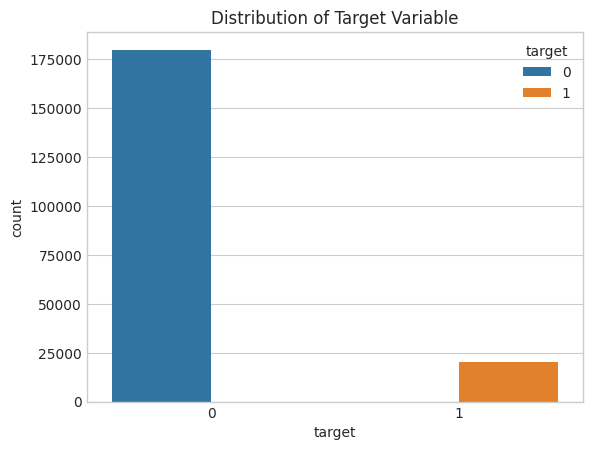

In [8]:
sns.countplot(x='target', data=train_df, hue='target')
plt.title('Distribution of Target Variable')
plt.show()

As seen in the graph above, the distribution of the target variable is predominantly 0

### var0 to var199 Variable
We need to understand var0 to var199 variables. They are most important variables in our dataset. We will visualize them with some graphs in the below:

In [9]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2, 5, figsize=(18, 8))

    for feature in features:
        i += 1
        plt.subplot(2, 5, i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

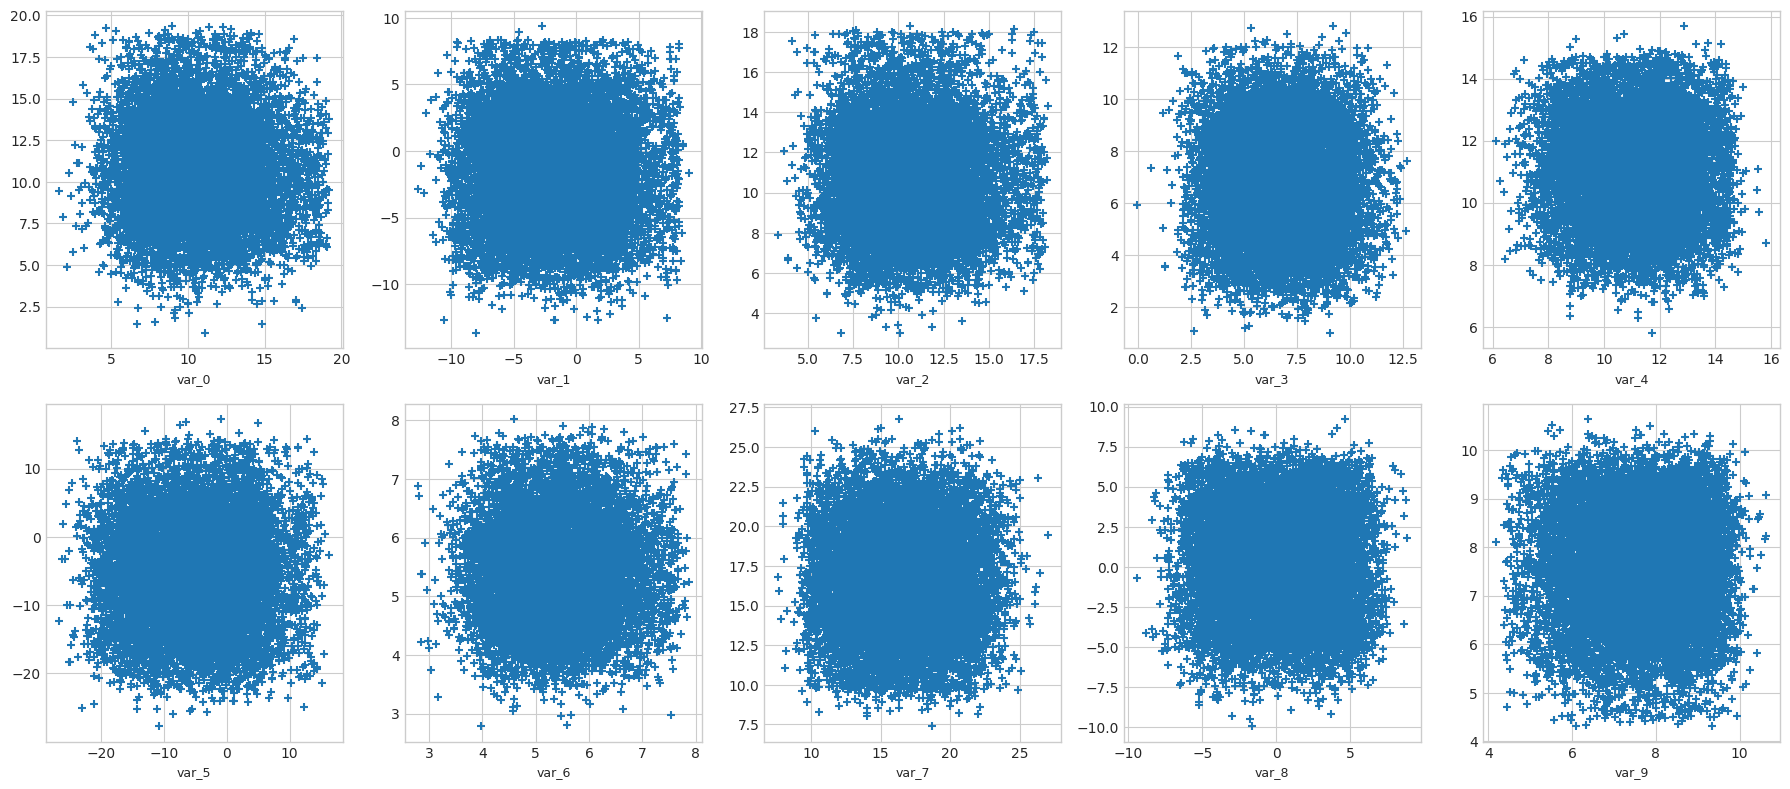

In [10]:
first_ten_features = ['var_' + str(i) for i in range(10)]
plot_feature_scatter(train_df[::20], test_df[::20], first_ten_features)

<a id = "7"></a><br>
## Multivariate Variable Analysis
Multivariate variable analysis refers to the effort of understanding the relationships between multiple variables simultaneously. This type of analysis typically involves statistical techniques such as correlation matrices, multiple regression analyses, and factor analyses. These methods are employed to comprehend how variables correlate with each other and the impact of one variable on others.

Now, as part of this multivariate variable analysis, we will explore the relationships between the variables from var_0 to var_199 by examining the correlation matrix.

We will select variables from var_0 to var_199

In [11]:
selected_features = ['var_' + str(i) for i in range(200)]

We will calculate the correlation matrix

In [12]:
correlation_matrix = train_df[selected_features].corr()

In [13]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

We will visualize the correlation matrix with a heatmap

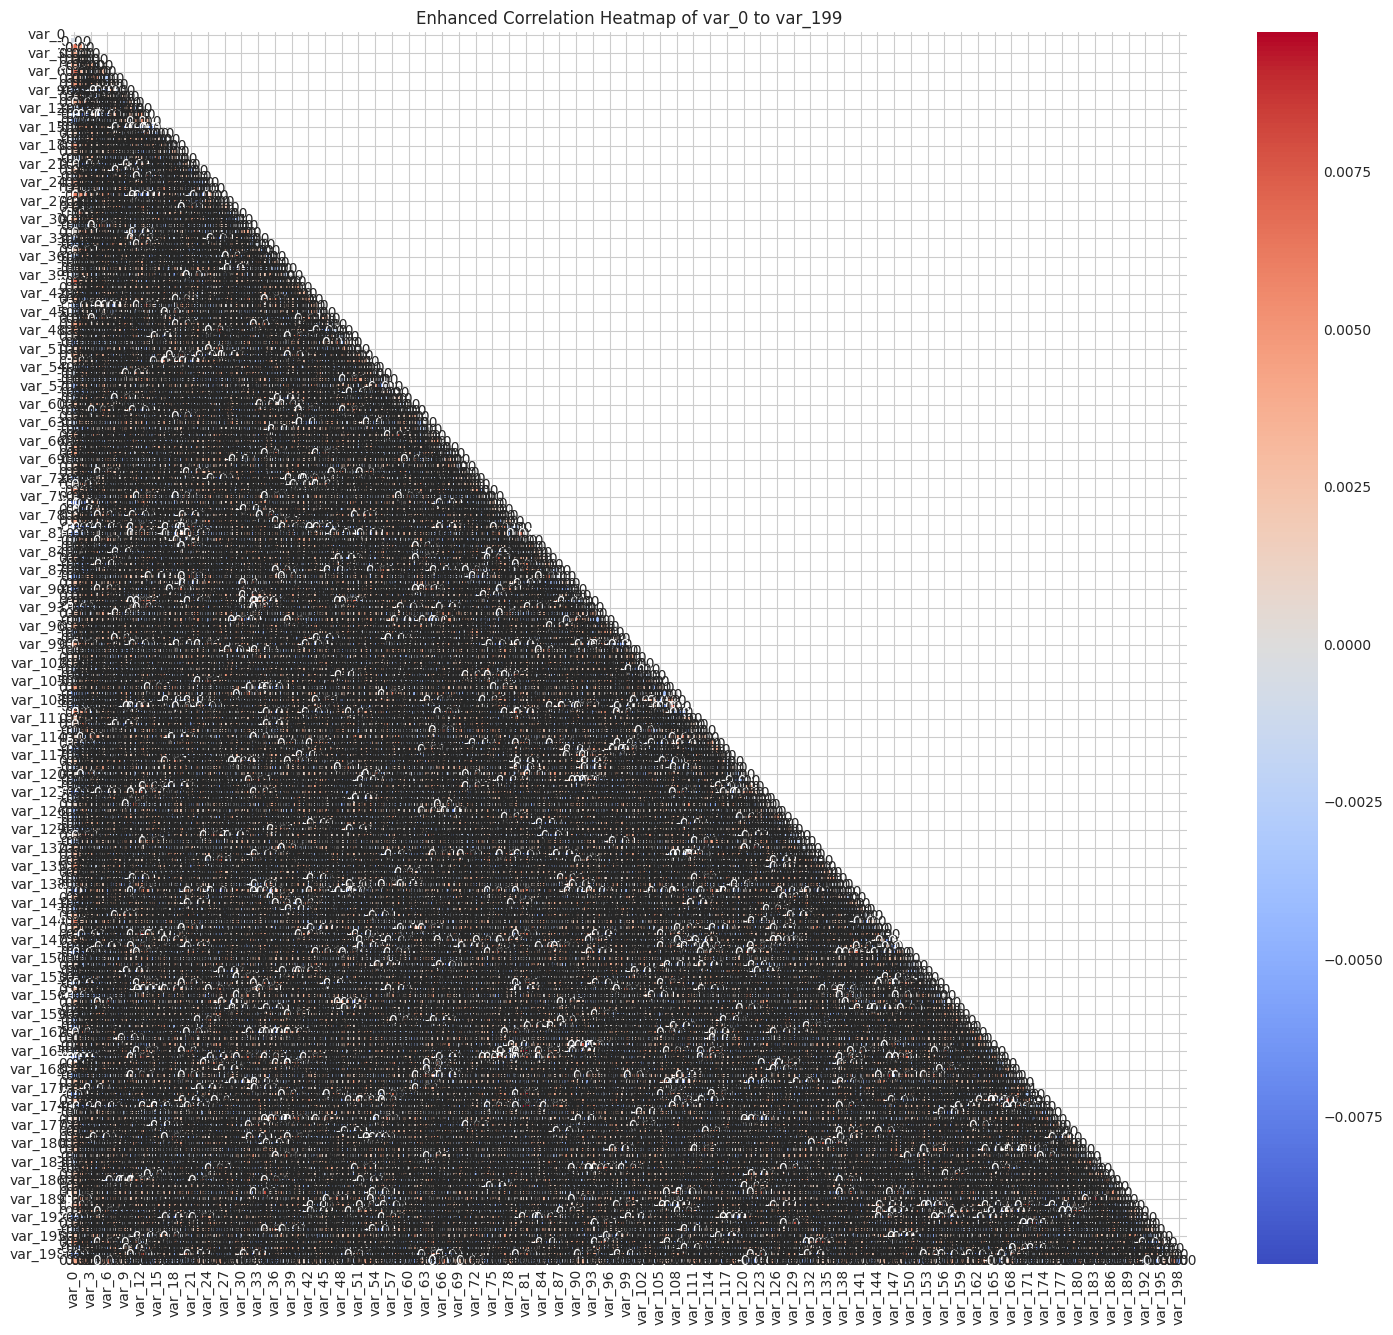

In [14]:
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", mask=mask)
plt.title('Enhanced Correlation Heatmap of var_0 to var_199')
plt.show()

<a id = "8"></a><br>
# Basic Data Analysis

We will do basic data analysis. Basic data analysis serves as the foundation for understanding and extracting valuable insights from raw data. 

We can choose some columhs from var_0 to var_199. I will choose var_0 and var_199. We can do analysis according to target column in the below!

In [15]:
train_df[["var_0","var_199","target"]].groupby(["var_0","var_199"], as_index = False).mean().sort_values(by="target",ascending = False)

,var_0,var_199,target
35376,7.7662,2.5046,1.0
155861,13.0298,-3.9100,1.0
73373,9.4450,-7.0514,1.0
48522,8.3874,6.6841,1.0
15638,6.5247,15.3233,1.0
...,...,...,...
69812,9.2980,5.8310,0.0
69813,9.2981,-19.7175,0.0
69814,9.2981,-9.0145,0.0
69815,9.2981,0.6632,0.0


We need to conduct a detailed analysis, so I will refer to all var_x columns as **'selected_features'** in the sections below.

In [16]:
selected_features = ['var_' + str(i) for i in range(200)]

In [17]:
basic_analysis = train_df[selected_features + ["target"]].groupby(selected_features, as_index=False).mean().sort_values(by="target", ascending=False)
basic_analysis

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
29180,7.4404,-0.5130,11.6500,8.1887,7.8550,-9.7393,4.3723,16.8788,4.9315,6.5842,...,3.5499,-0.2600,2.2491,19.6629,-0.4658,8.7192,9.8613,9.2996,4.5253,1.0
158580,13.1689,1.5786,10.5100,8.3686,12.5695,-3.9291,3.7310,19.5147,-1.2743,7.4436,...,10.5494,2.8283,-0.6010,17.0554,-1.1913,8.3131,8.4759,12.7434,11.8579,1.0
89183,10.0819,-4.7675,13.3760,4.0984,13.6582,-10.0278,4.6792,13.4550,2.7524,7.3828,...,8.4012,-0.3384,5.7399,14.2855,3.2592,-6.1096,8.8869,8.4055,-14.9803,1.0
137489,12.1776,-0.2152,11.5774,9.0070,13.1566,-1.1101,3.8678,14.6457,-1.4921,5.8133,...,4.2039,0.0285,7.5668,16.3684,0.8564,-3.6750,7.7912,10.5545,1.8346,1.0
68693,9.2505,7.2100,10.1612,5.1742,8.7376,0.6116,4.4654,20.6663,-2.1296,6.6657,...,6.9782,4.1763,2.4782,18.2219,2.7014,13.8520,8.0580,15.6147,-5.8962,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69813,9.2980,-0.1408,7.3331,4.7854,11.9233,-11.5187,5.0309,14.4058,-2.4134,6.0535,...,7.0724,0.3769,3.5027,12.3910,0.2954,8.2289,9.4731,13.5510,5.8310,0.0
69814,9.2980,0.2409,6.7707,5.0043,9.3578,-8.4787,5.6582,13.3929,3.3110,8.5462,...,3.2987,4.0536,9.3858,22.6064,-0.4332,-6.2313,9.5480,16.4391,1.9541,0.0
69815,9.2981,-11.0722,11.3933,10.1309,11.9375,-13.8265,6.5664,16.2613,2.7084,7.2213,...,6.1704,0.3084,8.7815,20.3928,0.8027,-3.5888,9.7677,18.8766,-19.7175,0.0
69816,9.2981,-7.8677,11.8517,4.3113,12.1013,3.8602,6.9519,15.0795,0.8419,8.9135,...,5.2513,2.8126,7.9287,18.1494,0.6830,6.0464,9.2398,20.1879,7.1068,0.0


It's a bit complex as it is! I'll simplify it by using the `.head()` and `.tail()` methods!

In [18]:
basic_analysis.head(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
29180,7.4404,-0.5130,11.6500,8.1887,7.8550,-9.7393,4.3723,16.8788,4.9315,6.5842,...,3.5499,-0.2600,2.2491,19.6629,-0.4658,8.7192,9.8613,9.2996,4.5253,1.0
158580,13.1689,1.5786,10.5100,8.3686,12.5695,-3.9291,3.7310,19.5147,-1.2743,7.4436,...,10.5494,2.8283,-0.6010,17.0554,-1.1913,8.3131,8.4759,12.7434,11.8579,1.0
89183,10.0819,-4.7675,13.3760,4.0984,13.6582,-10.0278,4.6792,13.4550,2.7524,7.3828,...,8.4012,-0.3384,5.7399,14.2855,3.2592,-6.1096,8.8869,8.4055,-14.9803,1.0
137489,12.1776,-0.2152,11.5774,9.0070,13.1566,-1.1101,3.8678,14.6457,-1.4921,5.8133,...,4.2039,0.0285,7.5668,16.3684,0.8564,-3.6750,7.7912,10.5545,1.8346,1.0
68693,9.2505,7.2100,10.1612,5.1742,8.7376,0.6116,4.4654,20.6663,-2.1296,6.6657,...,6.9782,4.1763,2.4782,18.2219,2.7014,13.8520,8.0580,15.6147,-5.8962,1.0
181628,14.8382,-1.7280,9.2161,6.7827,12.8359,-12.7174,5.9387,14.5082,1.2218,5.0104,...,9.4675,2.2031,5.5904,18.1986,-0.4206,14.0848,7.8258,18.3037,12.0463,1.0
118887,11.3270,-1.9826,10.0942,7.5637,11.0863,3.9547,7.1385,17.5315,5.5248,5.2728,...,5.3007,-0.4735,5.2120,24.1906,-1.8672,-3.5297,9.2563,19.6630,6.6808,1.0
158573,13.1685,-0.0761,16.9922,5.7896,10.0143,11.1954,4.8851,19.3058,5.9142,6.8902,...,5.2535,2.2854,0.8708,15.4606,1.1432,6.6940,10.2977,19.8693,4.1508,1.0
89191,10.0822,-6.8727,5.4289,8.6716,11.0331,4.4281,5.1317,11.9513,-4.9693,9.2331,...,8.6656,1.8038,7.6527,11.0299,0.7355,-4.0645,7.0549,18.8250,2.2433,1.0
20178,6.8711,-3.8519,9.8656,6.3037,14.2909,-6.1077,5.5728,15.2712,3.0943,7.9897,...,9.0639,1.8512,4.0614,14.8432,-1.1121,2.2910,8.9895,19.1096,-1.5951,1.0


In [19]:
basic_analysis.tail(10)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
69808,9.2977,4.1426,11.3486,4.8838,10.7855,-14.9685,6.6927,17.7320,0.4802,5.3099,...,14.4995,0.2258,1.8740,21.2988,-0.7807,-4.0527,9.7306,15.5501,4.8955,0.0
69809,9.2978,-7.8540,7.2029,2.3864,8.1794,-19.1116,5.3460,20.4879,-2.8014,7.6818,...,11.2368,1.3460,6.1066,19.3626,-0.4348,9.0390,10.2245,18.0033,3.8635,0.0
69810,9.2978,-2.8647,13.4590,6.5308,11.0519,-11.6048,3.1932,14.6561,3.0034,6.5544,...,10.1751,0.9449,0.9860,15.0018,-0.5830,-5.4524,8.7647,8.5125,11.1822,0.0
69811,9.2978,-1.6780,6.5745,6.5430,12.3734,-17.4360,5.4381,16.6473,4.5642,9.9119,...,3.9390,-0.0564,6.9430,20.7023,3.1116,3.8846,9.1177,14.0274,-6.8321,0.0
69812,9.2980,-3.4395,13.1227,7.7004,13.3500,12.6890,5.4184,20.5189,-1.3027,5.6301,...,10.4709,2.5138,-5.1593,21.4827,-0.8034,-2.6062,9.9636,17.9770,4.8078,0.0
69813,9.2980,-0.1408,7.3331,4.7854,11.9233,-11.5187,5.0309,14.4058,-2.4134,6.0535,...,7.0724,0.3769,3.5027,12.3910,0.2954,8.2289,9.4731,13.5510,5.8310,0.0
69814,9.2980,0.2409,6.7707,5.0043,9.3578,-8.4787,5.6582,13.3929,3.3110,8.5462,...,3.2987,4.0536,9.3858,22.6064,-0.4332,-6.2313,9.5480,16.4391,1.9541,0.0
69815,9.2981,-11.0722,11.3933,10.1309,11.9375,-13.8265,6.5664,16.2613,2.7084,7.2213,...,6.1704,0.3084,8.7815,20.3928,0.8027,-3.5888,9.7677,18.8766,-19.7175,0.0
69816,9.2981,-7.8677,11.8517,4.3113,12.1013,3.8602,6.9519,15.0795,0.8419,8.9135,...,5.2513,2.8126,7.9287,18.1494,0.6830,6.0464,9.2398,20.1879,7.1068,0.0
199999,20.3150,3.7755,7.5366,10.8933,10.5552,5.0879,5.4532,17.5903,0.2107,8.1488,...,4.0647,1.0206,4.8478,18.3133,-0.3395,-0.5236,8.0608,14.4211,6.7592,0.0


Let's attempt to comprehend the data by examining the first 10 values and the last 10 values. With this, we have completed basic data analysis! Now, we can proceed to the **Data Cleaning** step.

<a id = "9"></a><br>
# Data Cleaning

In the data cleaning, we have the most important step for data science lifecycle. In a lot of project, this step is %80 of the work. We will give importance because of that data cleaning step. We will apply that steps: 

* **Outlier Detection**

    We will focus IQR test for outlier detection.
    
* **Missing Values**

    We will find and fill missing values.
    
In the end of this part we will visualize some values.